# 日経平均株価 月足

In [5]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import seaborn as sns
import scipy.stats as stats
import yfinance as yf

code = 'N225'
symbol = '^%s' % code
#symbol = 'USDJPY=X'
ticker = yf.Ticker(symbol)
df = ticker.history(period='10y', interval='1mo')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-04-01 00:00:00+09:00,19129.750000,20252.119141,18927.949219,19520.009766,3047400000,0.0,0.0
2015-05-01 00:00:00+09:00,19510.849609,20655.330078,19257.849609,20563.150391,3291500000,0.0,0.0
2015-06-01 00:00:00+09:00,20444.539062,20952.710938,19990.550781,20235.730469,3459500000,0.0,0.0
2015-07-01 00:00:00+09:00,20291.050781,20850.000000,19115.199219,20585.240234,3318200000,0.0,0.0
2015-08-01 00:00:00+09:00,20540.210938,20946.929688,17714.300781,18890.480469,3723100000,0.0,0.0
...,...,...,...,...,...,...,...
2024-11-01 00:00:00+09:00,38504.351562,39884.011719,37801.621094,38208.031250,2649300000,0.0,0.0
2024-12-01 00:00:00+09:00,38216.949219,40398.230469,37958.550781,39894.539062,2568500000,0.0,0.0
2025-01-01 00:00:00+09:00,39945.421875,40288.800781,38055.679688,39572.488281,2191000000,0.0,0.0


In [6]:
df0 = ticker.history(period='max', interval='1mo')
df0

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1985-01-01 00:00:00+09:00,11543.000000,11992.309570,11543.000000,11992.309570,0,0.0,0.0
1985-02-01 00:00:00+09:00,11946.959961,12321.919922,11823.429688,12321.919922,0,0.0,0.0
1985-03-01 00:00:00+09:00,12412.139648,12604.019531,12263.849609,12580.759766,0,0.0,0.0
1985-04-01 00:00:00+09:00,12677.150391,12683.259766,12052.820312,12426.290039,0,0.0,0.0
1985-05-01 00:00:00+09:00,12456.650391,12790.269531,12358.030273,12758.459961,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-11-01 00:00:00+09:00,38504.351562,39884.011719,37801.621094,38208.031250,2649300000,0.0,0.0
2024-12-01 00:00:00+09:00,38216.949219,40398.230469,37958.550781,39894.539062,2568500000,0.0,0.0
2025-01-01 00:00:00+09:00,39945.421875,40288.800781,38055.679688,39572.488281,2191000000,0.0,0.0


In [16]:
period = 12
r_last = len(df0)
r1 = 0
df0['Median'] = np.nan
df0['Q1'] = np.nan
df0['Q3'] = np.nan
while r1 < r_last - period:
    r2 = r1 + period
    df1 = df0.iloc[r1:r2].copy()
    med = np.median(df1['Close'])
    q3, q1 = np.percentile(df1['Close'], [75, 25])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)  # 下限を設定
    upper_bound = q3 + (1.5 * iqr)  # 上限を設定
    name_index = df0.index[r2]
    df0.at[name_index, 'Median'] = med
    df0.at[name_index, 'Q1'] = q1
    df0.at[name_index, 'Q3'] = q3
    df0.at[name_index, 'Lower'] = lower_bound
    df0.at[name_index, 'Upper'] = upper_bound
    r1 += 1
df0

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Median,Q1,Q3,Lower,Upper
Date,,,,,,,,,,,,
1985-01-01 00:00:00+09:00,11543.000000,11992.309570,11543.000000,11992.309570,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1985-02-01 00:00:00+09:00,11946.959961,12321.919922,11823.429688,12321.919922,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1985-03-01 00:00:00+09:00,12412.139648,12604.019531,12263.849609,12580.759766,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1985-04-01 00:00:00+09:00,12677.150391,12683.259766,12052.820312,12426.290039,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1985-05-01 00:00:00+09:00,12456.650391,12790.269531,12358.030273,12758.459961,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-01 00:00:00+09:00,38504.351562,39884.011719,37801.621094,38208.031250,2649300000,0.0,0.0,38567.824219,37511.340820,39117.913086,35101.482422,41527.771484
2024-12-01 00:00:00+09:00,38216.949219,40398.230469,37958.550781,39894.539062,2568500000,0.0,0.0,38567.824219,38135.911133,39117.913086,36662.908203,40590.916016
2025-01-01 00:00:00+09:00,39945.421875,40288.800781,38055.679688,39572.488281,2191000000,0.0,0.0,38864.500000,38356.252930,39270.413086,36985.012695,40641.653320


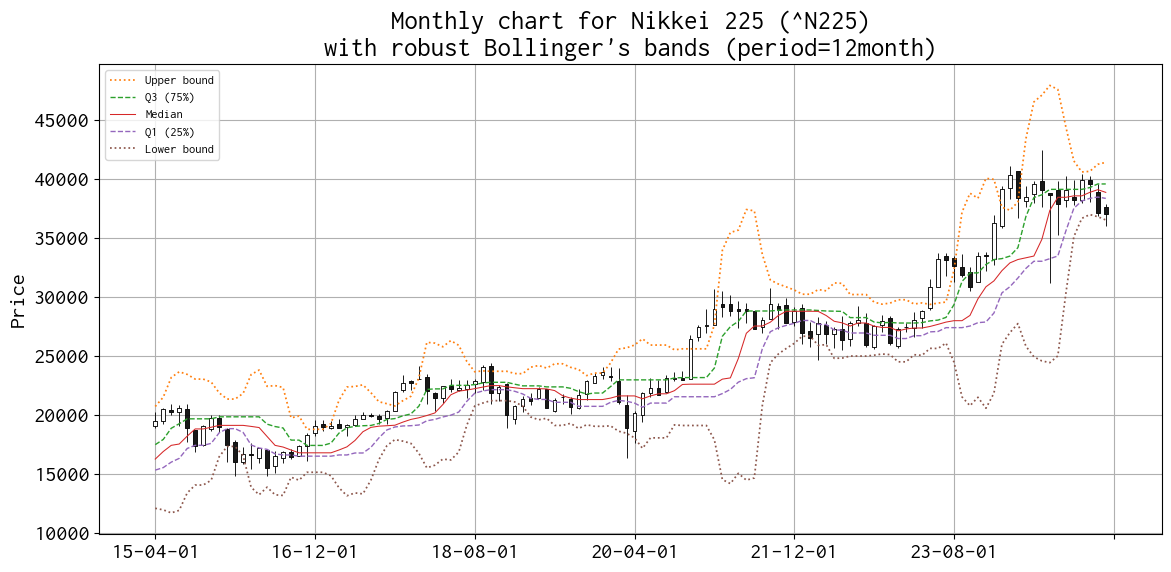

In [17]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig, ax = plt.subplots(figsize=(12, 6))

# Bollinger bands
mv_median = df0['Median']
mv_q1 = df0['Q1']
mv_q3 = df0['Q3']
mv_lower = df0['Lower']
mv_upper = df0['Upper']

apds  = [
    mpf.make_addplot(mv_upper[df.index], width=1.25, color='C1', linestyle='dotted', label='Upper bound', ax=ax),
    mpf.make_addplot(mv_q3[df.index], width=1, color='C2', linestyle='dashed', label='Q3 (75%)', ax=ax),
    mpf.make_addplot(mv_median[df.index], width=0.75, color='C3', label='Median', ax=ax),
    mpf.make_addplot(mv_q1[df.index], width=1, color='C4', linestyle='dashed', label='Q1 (25%)', ax=ax),
    mpf.make_addplot(mv_lower[df.index], width=1.25, color='C5', linestyle='dotted', label='Lower bound', ax=ax),
]   

mpf.plot(
    df, type='candle', style='default',
    addplot=apds,
    volume=False,
    datetime_format='%y-%m-%d',
    xrotation=0,
    ax=ax,
)

try:
    ax.set_title('Monthly chart for %s (%s)\nwith robust Bollinger\'s bands (period=12month)' % (ticker.info['longName'], symbol))
except KeyError:
    ax.set_title('Monthly chart for %s\nwith robust Bollinger\'s bands (period=12month)' % symbol)

ax.grid()
ax.legend(loc='best', fontsize=9)

plt.tight_layout()
plt.savefig('monthly_chart_bollinger_robust_%s.png' % code)
plt.show()

In [18]:
df.tail(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-02-01 00:00:00+09:00,38932.660156,39581.468750,36840.121094,37155.500000,2515300000,0.0,0.0
2025-03-01 00:00:00+09:00,37617.500000,37874.378906,35987.128906,37053.101562,1170800000,0.0,0.0


In [19]:
df.tail(2)['Close']

Date
2025-02-01 00:00:00+09:00    37155.500000
2025-03-01 00:00:00+09:00    37053.101562
Name: Close, dtype: float64

In [20]:
df.tail(2)['Close'].diff()

Date
2025-02-01 00:00:00+09:00           NaN
2025-03-01 00:00:00+09:00   -102.398438
Name: Close, dtype: float64

In [21]:
df['Close'].tail(1) - df['Open'].tail(1)

Date
2025-03-01 00:00:00+09:00   -564.398438
dtype: float64

In [22]:
df['Close'].rolling(13).mean().tail()

Date
2024-11-01 00:00:00+09:00    37862.188101
2024-12-01 00:00:00+09:00    38355.084135
2025-01-01 00:00:00+09:00    38824.954627
2025-02-01 00:00:00+09:00    38891.784555
2025-03-01 00:00:00+09:00    38729.239183
Name: Close, dtype: float64

In [23]:
df['Close'].rolling(26).mean().tail()

Date
2024-11-01 00:00:00+09:00    33773.651292
2024-12-01 00:00:00+09:00    34247.000451
2025-01-01 00:00:00+09:00    34693.288837
2025-02-01 00:00:00+09:00    35118.711914
2025-03-01 00:00:00+09:00    35492.788537
Name: Close, dtype: float64

In [24]:
df['Close'].rolling(52).mean().tail()

Date
2024-11-01 00:00:00+09:00    30530.778358
2024-12-01 00:00:00+09:00    30852.985652
2025-01-01 00:00:00+09:00    31168.127366
2025-02-01 00:00:00+09:00    31440.788311
2025-03-01 00:00:00+09:00    31645.009127
Name: Close, dtype: float64

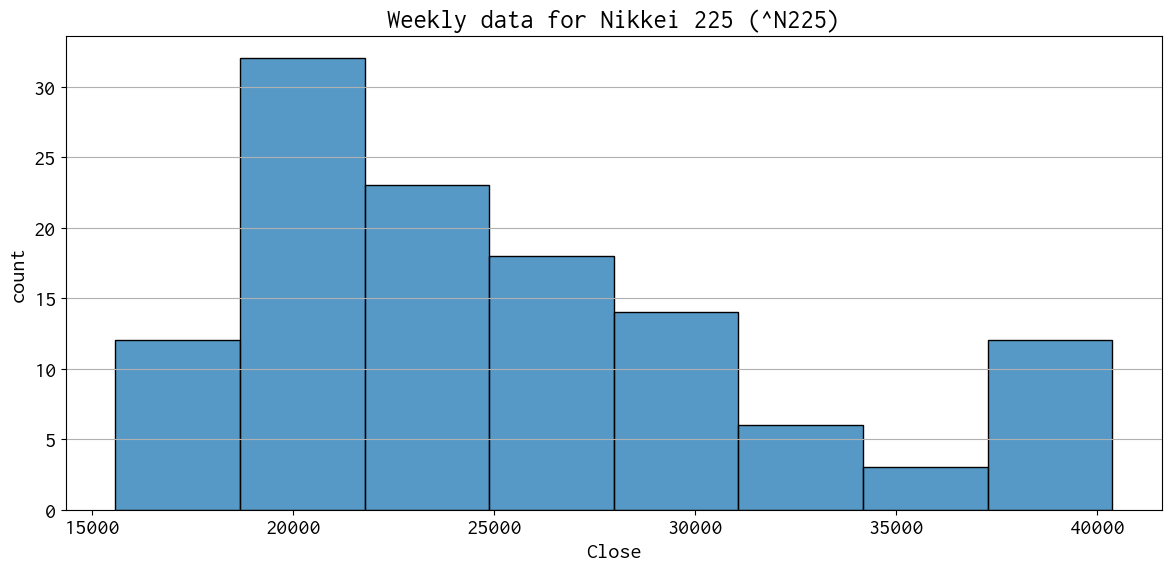

In [25]:
plt.rcParams['font.size'] = 16
fig = plt.figure(figsize=(12, 6))
#ax = fig.add_axes(111)
ax = fig.add_subplot(111)

ax = sns.histplot(
  data = df,
  x = "Close"
)
ax.set_xlabel("Close")
ax.set_ylabel("count")
ax.set_title('Weekly data for %s (%s)' % (ticker.info['longName'], symbol))
ax.grid(axis = 'y')

plt.tight_layout()
plt.savefig('weekly_histogram_%s.png' % code)
plt.show()

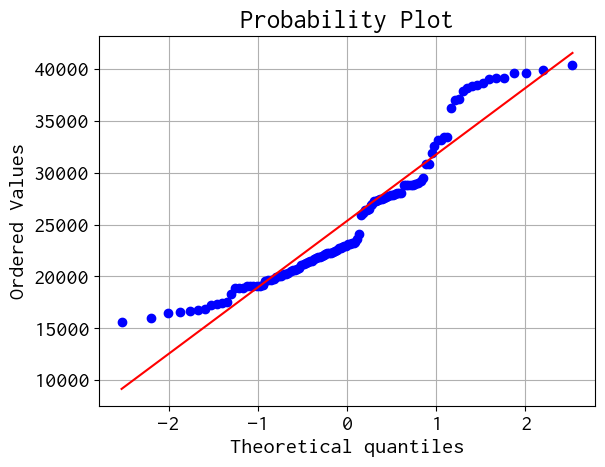

In [26]:
# Q-Qプロットの描画
stats.probplot(df['Close'], dist="norm", plot=plt)
plt.grid()
plt.show()

In [27]:
len(df)

120

In [28]:
W, shapiro_p_value = stats.shapiro(df['Close'])
print(f'Shapiro-Wilk test statistic: {W}, p-value: {shapiro_p_value}')

Shapiro-Wilk test statistic: 0.913200016119383, p-value: 9.901990963750232e-07
